In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
kc = pd.read_csv('results_kc.csv').drop(columns=['Unnamed: 0'])
poa = pd.read_csv('results_poa.csv').drop(columns=['Unnamed: 0'])
sp = pd.read_csv('results_sp.csv').drop(columns=['Unnamed: 0'])
fc = pd.read_csv('results_fc.csv').drop(columns=['Unnamed: 0'])
nl = pd.read_csv('results_nl.csv').drop(columns=['Unnamed: 0'])

metrics = ['MALE_test', 'RMSE_test', 'MAPE_test']#, 'MALE_train', 'RMSE_train', 'MAPE_train']
metrics = ['RMSE_test']

In [8]:
all_results = {}

def create_results(df):
    results = {}
    results['original'] = {}
    for threshold in df['threshold'].unique():
        results[str(threshold)] = {}

    original = df[df['isMasked'] == False]
    ours = df[df['isMasked'] == True]

    for metric in metrics:
        results['original'][metric] = (original[metric].mean(), original[metric].std())
        for threshold in df['threshold'].unique():
            results[str(threshold)][metric] = (ours[ours['threshold'] == threshold][metric].mean(), ours[ours['threshold'] == threshold][metric].std())

    return results
    
all_results['kc'] = create_results(kc)
all_results['poa'] = create_results(poa)
all_results['sp'] = create_results(sp)
all_results['fc'] = create_results(fc)
all_results['nl'] = create_results(nl)

In [13]:
print(all_results['kc']['original']['RMSE_test'][0] - min([all_results['kc'][e]['RMSE_test'][0] for e in all_results['kc'].keys() if e != 'original']))
print(all_results['fc']['original']['RMSE_test'][0] - min([all_results['fc'][e]['RMSE_test'][0] for e in all_results['fc'].keys() if e != 'original']))
print(all_results['poa']['original']['RMSE_test'][0] - min([all_results['poa'][e]['RMSE_test'][0] for e in all_results['poa'].keys() if e != 'original']))
print(all_results['sp']['original']['RMSE_test'][0] - min([all_results['sp'][e]['RMSE_test'][0] for e in all_results['sp'].keys() if e != 'original']))
print(all_results['nl']['original']['RMSE_test'][0] - min([all_results['nl'][e]['RMSE_test'][0] for e in all_results['nl'].keys() if e != 'original']))

KeyError: 'RMSE_test'

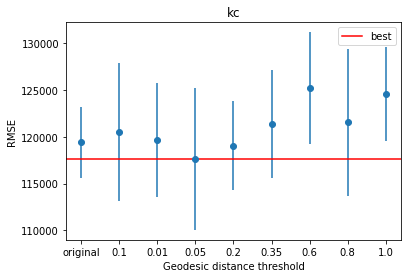

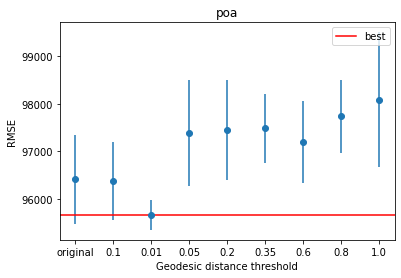

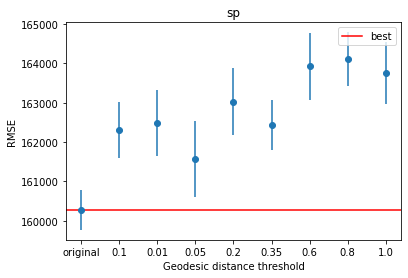

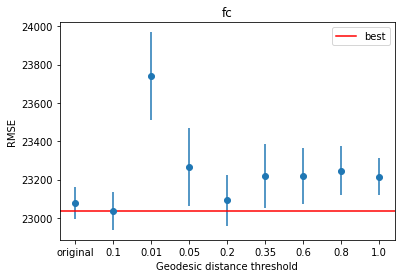

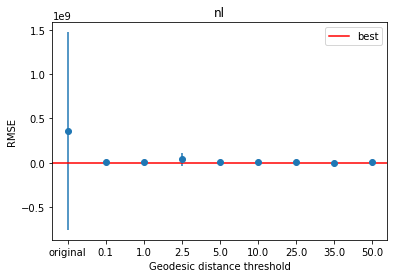

In [9]:
def plot(results, dataset):
    for metric in metrics:
        plt.figure()
        plt.title(dataset)
        plt.xlabel('Geodesic distance threshold')
        plt.ylabel("RMSE")

        plt.errorbar(list(results.keys()), [results[e][metric][0] for e in results.keys()], yerr=[results[e][metric][1] for e in results.keys()], fmt='o')

        # for exp in results.keys():
            # plt.bar(exp, results[exp][metric][0])
            # print(exp, results[exp][metric][0], results[exp][metric][1])

            # plt.errorbar(exp, results[exp][metric][0], yerr=results[exp][metric][1], fmt='o')
        # set horizontal line
        plt.axhline(y=np.min([results[e][metric][0] for e in results.keys()]), color='r', linestyle='-', label="best")

        # plt.ylim(0)

        # set y to log scale
        # plt.yscale('log')

        plt.legend()
        plt.savefig('results_' + dataset + '_' + metric + '.png', dpi=300)
        plt.show()

for dataset in all_results.keys():
    plot(all_results[dataset], dataset)

In [10]:
kc = (117644.7, 119425.5) 
poa = (95664.4, 96411.7)
fc = (23036.1, 23075.8)
nl = (147602.1, 149365.5)

print((kc[0] - kc[1]) / kc[1])
print((poa[0] - poa[1]) / poa[1])
print((fc[0] - fc[1]) / fc[1])
print((nl[0] - nl[1]) / nl[1])


-0.014911388271349107
-0.007751133939138123
-0.0017204170602969661
-0.011805939122488085
